In [1]:

import pandas as pd




In [2]:
material_prices  = pd.read_csv('/home/saad/Downloads/Material_Prices.csv')
logistics_data = pd.read_csv('/home/saad/Downloads/Logistics_Data.csv')
demand_data = pd.read_csv('/home/saad/Downloads/Demand_Data.csv')

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Columns to scale in Material Prices dataset
columns_to_scale = ['Lithium Price (USD/ton)', 'Cobalt Price (USD/ton)', 'Nickel Price (USD/ton)']

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
material_prices_minmax_scaled = material_prices.copy()
material_prices_minmax_scaled[columns_to_scale] = min_max_scaler.fit_transform(material_prices[columns_to_scale])

# Z-Score Standardization
z_score_scaler = StandardScaler()
material_prices_zscore_scaled = material_prices.copy()
material_prices_zscore_scaled[columns_to_scale] = z_score_scaler.fit_transform(material_prices[columns_to_scale])

# Display the first few rows of scaled datasets
print("Min-Max Scaled Data:")
print(material_prices_minmax_scaled.head())

print("\nZ-Score Standardized Data:")
print(material_prices_zscore_scaled.head())


Min-Max Scaled Data:
         Date  Lithium Price (USD/ton)  Cobalt Price (USD/ton)  \
0  2020-01-31                 0.438361                0.604847   
1  2020-02-29                 0.058278                0.277083   
2  2020-03-31                 0.752003                0.561006   
3  2020-04-30                 0.318707                0.534632   
4  2020-05-31                 0.056933                0.030849   

   Nickel Price (USD/ton)  
0                0.338490  
1                0.165744  
2                0.666469  
3                0.927070  
4                0.076714  

Z-Score Standardized Data:
         Date  Lithium Price (USD/ton)  Cobalt Price (USD/ton)  \
0  2020-01-31                -0.013439                0.311916   
1  2020-02-29                -1.294132               -0.778258   
2  2020-03-31                 1.043382                0.166097   
3  2020-04-30                -0.416613                0.078373   
4  2020-05-31                -1.298663               -1.

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaling for Material Prices Dataset
columns_to_scale = ['Lithium Price (USD/ton)', 'Cobalt Price (USD/ton)', 'Nickel Price (USD/ton)']

# Initialize Min-Max Scaler
min_max_scaler = MinMaxScaler()

# Create a scaled version of the dataset
material_prices_minmax_scaled = material_prices.copy()
material_prices_minmax_scaled[columns_to_scale] = min_max_scaler.fit_transform(material_prices[columns_to_scale])

# Save the Min-Max scaled dataset
scaled_file_path = "/home/saad/Downloads/dataset/Material_Prices_MinMax_Scaled.csv"
material_prices_minmax_scaled.to_csv(scaled_file_path, index=False)

scaled_file_path


'/home/saad/Downloads/dataset/Material_Prices_MinMax_Scaled.csv'

In [5]:
# Convert 'Date' to datetime format in Material Prices Data
material_prices['Date'] = pd.to_datetime(material_prices['Date'])

# Convert 'Month' to datetime format in Demand Data
demand_data['Month'] = pd.to_datetime(demand_data['Month'], format='%Y-%m-%d')

# Check for missing values
missing_material_prices = material_prices.isnull().sum()
missing_logistics_data = logistics_data.isnull().sum()
missing_demand_data = demand_data.isnull().sum()

# Normalize material price columns using Min-Max Scaling (for better model performance)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
material_prices[['Lithium Price (USD/ton)', 'Cobalt Price (USD/ton)', 'Nickel Price (USD/ton)']] = scaler.fit_transform(
    material_prices[['Lithium Price (USD/ton)', 'Cobalt Price (USD/ton)', 'Nickel Price (USD/ton)']])

# Check preprocessed data
material_prices_head = material_prices.head()
logistics_data_head = logistics_data.head()
demand_data_head = demand_data.head()

missing_material_prices, missing_logistics_data, missing_demand_data, material_prices_head, logistics_data_head, demand_data_head


(Date                       0
 Lithium Price (USD/ton)    0
 Cobalt Price (USD/ton)     0
 Nickel Price (USD/ton)     0
 dtype: int64,
 Supplier Location               0
 Manufacturing Plant             0
 Distance (km)                   0
 Transportation Cost (USD/km)    0
 dtype: int64,
 Month                        0
 Production Target (Units)    0
 Lithium (kg/unit)            0
 Cobalt (kg/unit)             0
 Nickel (kg/unit)             0
 dtype: int64,
         Date  Lithium Price (USD/ton)  Cobalt Price (USD/ton)  \
 0 2020-01-31                 0.438361                0.604847   
 1 2020-02-29                 0.058278                0.277083   
 2 2020-03-31                 0.752003                0.561006   
 3 2020-04-30                 0.318707                0.534632   
 4 2020-05-31                 0.056933                0.030849   
 
    Nickel Price (USD/ton)  
 0                0.338490  
 1                0.165744  
 2                0.666469  
 3                0.9

04:00:04 - cmdstanpy - INFO - Chain [1] start processing
04:00:05 - cmdstanpy - INFO - Chain [1] done processing


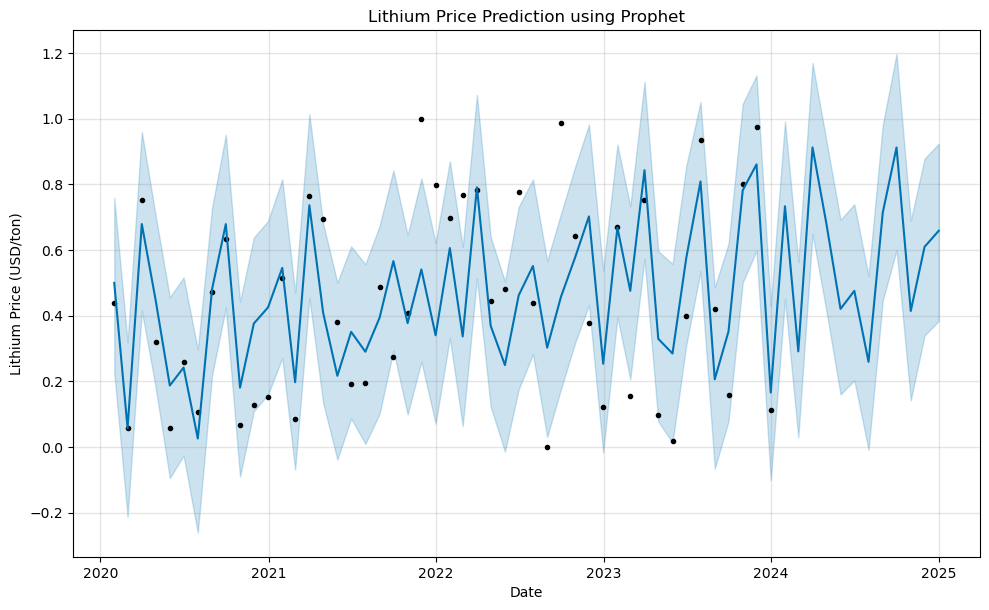

,ds,yhat,yhat_lower,yhat_upper
55,2024-08-31,0.713455,0.445699,0.980362
56,2024-09-30,0.911883,0.599050,1.196618
57,2024-10-31,0.413958,0.141744,0.689456
58,2024-11-30,0.609113,0.339103,0.877822
59,2024-12-31,0.658340,0.383668,0.923319


In [12]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Prepare data for Prophet (only use one price column for simplicity)
prophet_data = material_prices[['Date', 'Lithium Price (USD/ton)']].rename(columns={'Date': 'ds', 'Lithium Price (USD/ton)': 'y'})

# Initialize and train the Prophet model
model = Prophet()
model.fit(prophet_data)

# Make future predictions (e.g., for the next 12 months)
future = model.make_future_dataframe( periods=12, freq='M')
forecast = model.predict(future)

# Visualize the forecast
fig = model.plot(forecast)
plt.title('Lithium Price Prediction using Prophet')
plt.xlabel('Date')
plt.ylabel('Lithium Price (USD/ton)')
plt.show()

# Show the forecasted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


In [13]:
import networkx as nx

# Create a graph object for network analysis
G = nx.Graph()

# Add nodes (suppliers and plants)
suppliers = logistics_data['Supplier Location'].unique()
plants = logistics_data['Manufacturing Plant'].unique()

# Add edges (distances and costs)
for _, row in logistics_data.iterrows():
    G.add_edge(row['Supplier Location'], row['Manufacturing Plant'], weight=row['Distance (km)'], cost=row['Transportation Cost (USD/km)'])

# Now we can find the shortest path (minimum distance) from a supplier to a plant
def find_optimal_route(supplier, plant):
    # Use Dijkstra's algorithm to find the shortest path
    shortest_path = nx.shortest_path(G, source=supplier, target=plant, weight='weight')
    
    # Calculate the total transportation cost
    total_cost = 0
    for i in range(len(shortest_path)-1):
        edge = G[shortest_path[i]][shortest_path[i+1]]
        total_cost += edge['cost'] * edge['weight']
    
    return shortest_path, total_cost

# Example: Find the optimal route from 'Supplier A' to 'Plant X'
optimal_route, total_transportation_cost = find_optimal_route('Supplier A', 'Plant X')

# Show the optimal route and the total cost
optimal_route, total_transportation_cost


(['Supplier A', 'Plant X'], 2056.16)

In [14]:
# Create a new DataFrame for the total costs per month
total_cost_data = demand_data.copy()

# Calculate the material costs for each month based on production targets and predicted prices
# We will use the predicted lithium price from the forecast
predicted_prices = forecast[['ds', 'yhat']].rename(columns={'ds': 'Month', 'yhat': 'Predicted Lithium Price (USD/ton)'})
total_cost_data = total_cost_data.merge(predicted_prices, on='Month', how='left')

# Calculate material costs for lithium, cobalt, and nickel (based on unit production)
total_cost_data['Lithium Cost (USD)'] = total_cost_data['Production Target (Units)'] * total_cost_data['Lithium (kg/unit)'] * total_cost_data['Predicted Lithium Price (USD/ton)'] / 1000
total_cost_data['Cobalt Cost (USD)'] = total_cost_data['Production Target (Units)'] * total_cost_data['Cobalt (kg/unit)'] * material_prices['Cobalt Price (USD/ton)'].iloc[-1] / 1000  # Use the latest price for now
total_cost_data['Nickel Cost (USD)'] = total_cost_data['Production Target (Units)'] * total_cost_data['Nickel (kg/unit)'] * material_prices['Nickel Price (USD/ton)'].iloc[-1] / 1000  # Use the latest price for now

# Calculate logistics costs (assuming Supplier A to Plant X as an example)
logistics_costs = []
for _, row in total_cost_data.iterrows():
    supplier = 'Supplier A'  # You can loop through different suppliers for more comprehensive results
    plant = 'Plant X'  # Choose the plant here (or iterate through multiple plants)
    optimal_route, route_cost = find_optimal_route(supplier, plant)
    logistics_costs.append(route_cost * row['Production Target (Units)'])

total_cost_data['Logistics Cost (USD)'] = logistics_costs

# Calculate total manufacturing cost (Material Costs + Logistics Costs)
total_cost_data['Total Manufacturing Cost (USD)'] = total_cost_data['Lithium Cost (USD)'] + total_cost_data['Cobalt Cost (USD)'] + total_cost_data['Nickel Cost (USD)'] + total_cost_data['Logistics Cost (USD)']

# Show the results
total_cost_data[['Month', 'Total Manufacturing Cost (USD)']]


,Month,Total Manufacturing Cost (USD)
0,2023-01-31,2.189830e+06
1,2023-02-28,2.210390e+06
2,2023-03-31,2.520877e+06
3,2023-04-30,2.397500e+06
4,2023-05-31,2.126085e+06
5,2023-06-30,1.959537e+06
6,2023-07-31,1.994495e+06
7,2023-08-31,2.399555e+06
8,2023-09-30,1.928693e+06
9,2023-10-31,2.047955e+06


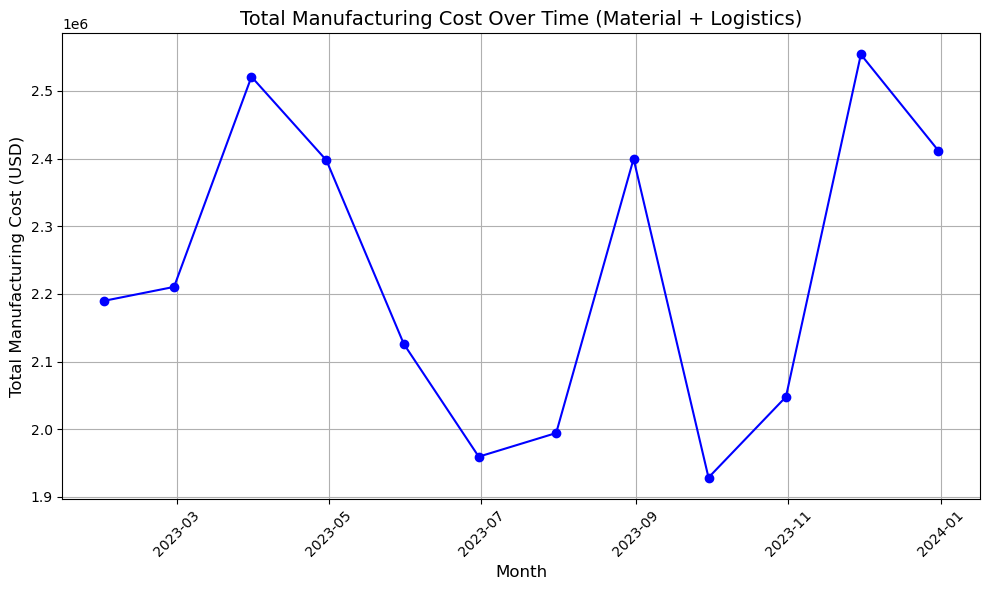

       Month  Total Manufacturing Cost (USD)
0 2023-01-31                    2.189830e+06
1 2023-02-28                    2.210390e+06
2 2023-03-31                    2.520877e+06
3 2023-04-30                    2.397500e+06
4 2023-05-31                    2.126085e+06


In [15]:
import matplotlib.pyplot as plt

# Visualize the total manufacturing cost over time
plt.figure(figsize=(10, 6))
plt.plot(total_cost_data['Month'], total_cost_data['Total Manufacturing Cost (USD)'], 
         marker='o', linestyle='-', color='b')
plt.title('Total Manufacturing Cost Over Time (Material + Logistics)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Manufacturing Cost (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the first few rows of total manufacturing cost data for inspection
print(total_cost_data[['Month', 'Total Manufacturing Cost (USD)']].head())
